**Предсказание с помощью нейросетей**


Предскажем класс изображения из CIFAR-10

In [1]:
import tensorflow as tf

# Загрузка данных CIFAR-10
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [2]:
import numpy as np  # Импорт библиотеки для работы с массивами и векторной алгеброй
from sklearn.metrics import accuracy_score  # Импорт функции для оценки точности модели
from matplotlib import pyplot as plt  # Импорт библиотеки для визуализации данных

# Настройка для отображения графиков непосредственно в блокноте (например, в Jupyter)
%matplotlib inline

import tensorflow as tf  # Импорт библиотеки TensorFlow для создания и обучения нейронных сетей
print("We're using TF", tf.__version__)  # Вывод версии TensorFlow
import tensorflow.keras as keras  # Импорт высокоуровневого API Keras для TensorFlow
import tensorflow.keras.models as models  # Импорт функционала для создания моделей в Keras
import tensorflow.keras.layers as layers  # Импорт слоев для нейронных сетей в Keras
import tensorflow.keras.backend as backend  # Импорт функций для низкоуровневой работы с тензорами и графами в Keras
import pandas as pd  # Импорт библиотеки для работы с данными в табличном виде (DataFrame)


We're using TF 2.18.0


Пример кусочка картинки:


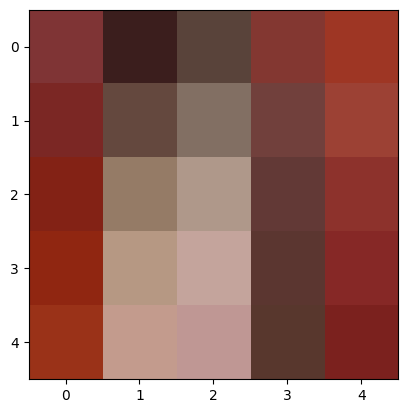

Пример картинки:


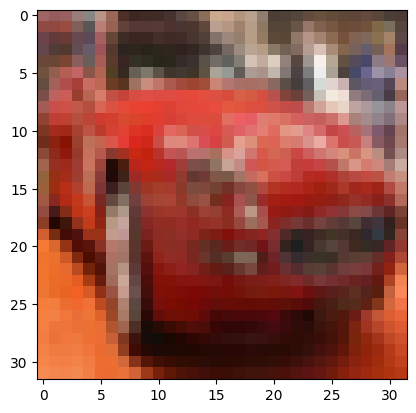

y_train [shape (50000, 1)] 10 примеров:
 [[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


In [3]:

X_train_image = X_train[5, :, :]

# Вывод примера части изображения
print("Пример кусочка картинки:")
plt.imshow(X_train_image[15:20, 5:10])  # Отображение небольшого фрагмента изображения (с 15 по 20 строку и с 5 по 10 столбец)
plt.show()  # Показать фрагмент изображения

# Вывод всего изображения
print("Пример картинки:")
plt.imshow(X_train_image)  # Отображение всего изображения с использованием цветовой карты "Greys" для оттенков серого
plt.show()  # Показать полное изображение

# Вывод первых 10 значений из y_train и информации о форме массива y_train
print("y_train [shape %s] 10 примеров:\n" % (str(y_train.shape)), y_train[:10])  # Печать формы массива y_train и первых 10 меток (классов) для изображений

In [4]:
X_train = X_train.astype(float) / 255
x_test = X_test.astype(float) / 255

In [5]:
y_train = keras.utils.to_categorical(y_train, 10)  # Применение one-hot кодирования к обучающим меткам
y_test = keras.utils.to_categorical(y_test, 10)

In [6]:
X_train[0].shape

(32, 32, 3)

In [7]:
model = models.Sequential()

model.add(layers.Flatten(input_shape = (32, 32, 3)))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))


model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 832,170 (3.17 MB)

 Trainable params: 831,210 (3.17 MB)

 Non-trainable params: 960 (3.75 KB)

In [9]:
model.compile(
    loss='categorical_crossentropy',  # минимизируем кросс-энтропию
    optimizer='adam',  # так будет быстрее, позже узнаем что это :)
    metrics=['accuracy']  # выводим процент правильных ответов
)

In [10]:
history = model.fit(
                    X_train,
                    y_train,
                    batch_size=64,  # 64 объекта для подсчета градиента на каждом шаге
                    epochs=20,  # 10 проходов по датасету
                    validation_split=0.2
                    )

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.1672 - loss: 2.5800 - val_accuracy: 0.2963 - val_loss: 1.9362
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2766 - loss: 1.9835 - val_accuracy: 0.3484 - val_loss: 1.8096
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3095 - loss: 1.9052 - val_accuracy: 0.3512 - val_loss: 1.8053
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3184 - loss: 1.8851 - val_accuracy: 0.3515 - val_loss: 1.8006
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3202 - loss: 1.8840 - val_accuracy: 0.3358 - val_loss: 1.8244
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3284 - loss: 1.8598 - val_accuracy: 0.3713 - val_loss: 1.7530
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3372 - loss: 1.8432 - val_accuracy: 0.3300 - val_loss: 1.8917
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3425 - loss: 1.8312 - val_accuracy: 0

In [11]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2747 - loss: 77.8397


[78.81945037841797, 0.2775000035762787]